### Deliverable 1: Preprocessing the Data for a Neural Network

In [43]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#Checkpoints directory
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [44]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [45]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [46]:
# Look at APPLICATION_TYPE value counts for binning
app_data = application_df.APPLICATION_TYPE.value_counts()
app_data

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

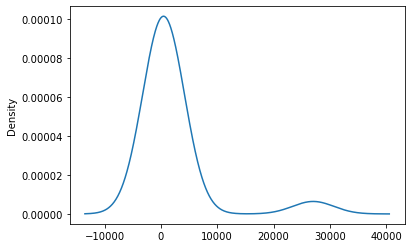

In [47]:
# Visualize the value counts of APPLICATION_TYPE
app_data.plot.density()

In [48]:
# Determine which values to replace if counts are less than 528
replace_application = list(app_data[app_data < 528].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [49]:
# Look at CLASSIFICATION value counts for binning
class_data = application_df.CLASSIFICATION.value_counts()
class_data

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

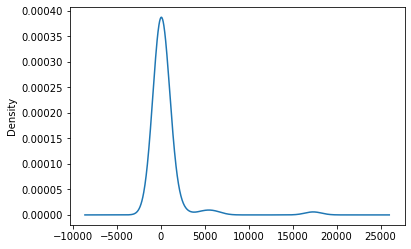

In [50]:
# Visualize the value counts of CLASSIFICATION
class_data.plot.density()

In [51]:
# Determine which values to replace if counts are less than 1883
replace_class = list(class_data[class_data < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [79]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [52]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

#pass list to the dataframe to count the nunique items in the selected columns
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [53]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\ryanj\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Merge one-hot encoded features
application_df = application_df.merge(encode_df,left_index=True, right_index=True)

# drop the originals
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\ryanj\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\ryanj\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [57]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# input features = the number of variables
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 352       
                                                                 
 dense_20 (Dense)            (None, 5)                 45        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [59]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=1,callbacks=[cp_callback])

  1/804 [..............................] - ETA: 6:01 - loss: 0.6911 - accuracy: 0.6875
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.7227 - accuracy: 0.4688  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.7097 - accuracy: 0.5031
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.7039 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.7015 - accuracy: 0.5453
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 50/804 [>..........................


Epoch 1: saving model to checkpoints\weights.01.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6253 - accuracy: 0.6678
Epoch 1: saving model to checkpoints\weights.01.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6252 - accuracy: 0.6682
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6251 - accuracy: 0.6684
Epoch 1: saving model to checkpoints\weights.01.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.6250 - accuracy: 0.6690
Epoch 1: saving model to checkpoints\weights.01.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6249 - accuracy: 0.6689
Epoch 1: saving model to checkpoints\weights.01.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6244 - accuracy: 0.6696
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
465/804 [=

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5791 - accuracy: 0.7198 - 441ms/epoch - 2ms/step
Loss: 0.5791277885437012, Accuracy: 0.7197667360305786


## Attempt 1
### More Layers

In [61]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# input features = the number of variables
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 352       
                                                                 
 dense_23 (Dense)            (None, 5)                 45        
                                                                 
 dense_24 (Dense)            (None, 2)                 12        
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/attempt1/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [63]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
  1/804 [..............................] - ETA: 7:49 - loss: 0.6905 - accuracy: 0.4375
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6906 - accuracy: 0.6031  
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5656
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5698
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5945
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf

375/804 [============>.................] - ETA: 2s - loss: 0.6689 - accuracy: 0.6298
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6681 - accuracy: 0.6308
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.6674 - accuracy: 0.6320
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6665 - accuracy: 0.6343
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6659 - accuracy: 0.6359
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: sav

760/804 [===========================>..] - ETA: 0s - loss: 0.6424 - accuracy: 0.6671
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6419 - accuracy: 0.6673
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6418 - accuracy: 0.6675
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6414 - accuracy: 0.6678
Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt1\weights.01.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6408 - accuracy: 0.6687
Epoch 2/25

Epoch 2: saving model to checkpoints/attempt1\weights.02.hd

326/804 [===========>..................] - ETA: 3s - loss: 0.5855 - accuracy: 0.7226
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.5847 - accuracy: 0.7231
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.5847 - accuracy: 0.7231
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.5843 - accuracy: 0.7234
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.5845 - accuracy: 0.7236
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.5844 - accuracy: 0.7239
Epoch 2: saving model to checkpoints/attempt1\weights.

704/804 [=========================>....] - ETA: 0s - loss: 0.5826 - accuracy: 0.7208
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5826 - accuracy: 0.7207
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5819 - accuracy: 0.7212
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5820 - accuracy: 0.7209
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5822 - accuracy: 0.7204
Epoch 2: saving model to checkpoints/attempt1\weights.02.hdf5

Epoch 2: sav

277/804 [=========>....................] - ETA: 3s - loss: 0.5772 - accuracy: 0.7189
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.5755 - accuracy: 0.7204
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.5759 - accuracy: 0.7200
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.5752 - accuracy: 0.7208
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.5748 - accuracy: 0.7216
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: sav

665/804 [=======================>......] - ETA: 0s - loss: 0.5730 - accuracy: 0.7219
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5723 - accuracy: 0.7224
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5726 - accuracy: 0.7224
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5727 - accuracy: 0.7224
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5727 - accuracy: 0.7224
Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt1\weights.03.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5724 - accuracy


Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.5654 - accuracy: 0.7297
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.5645 - accuracy: 0.7303
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.5645 - accuracy: 0.7298
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.5656 - accuracy: 0.7284
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.5659 - accuracy: 0.7281
Epoch 4: sav

603/804 [=====================>........] - ETA: 1s - loss: 0.5689 - accuracy: 0.7237
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.5690 - accuracy: 0.7232
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.5695 - accuracy: 0.7229
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.5696 - accuracy: 0.7227
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.5691 - accuracy: 0.7232
Epoch 4: saving model to checkpoints/attempt1\weights.04.hdf5

Epoch 4: sav

179/804 [=====>........................] - ETA: 4s - loss: 0.5618 - accuracy: 0.7332
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
189/804 [======>.......................] - ETA: 4s - loss: 0.5620 - accuracy: 0.7336
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.5634 - accuracy: 0.7326
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.5619 - accuracy: 0.7344
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.5635 - accuracy: 0.7329
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: sav

564/804 [====================>.........] - ETA: 1s - loss: 0.5658 - accuracy: 0.7267
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5660 - accuracy: 0.7270
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5655 - accuracy: 0.7272
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5654 - accuracy: 0.7271
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.5650 - accuracy: 0.7274
Epoch 5: saving model to checkpoints/attempt1\weights.05.hdf5

Epoch 5: sav

140/804 [====>.........................] - ETA: 4s - loss: 0.5648 - accuracy: 0.7308
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5668 - accuracy: 0.7304
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5667 - accuracy: 0.7301
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.5661 - accuracy: 0.7307
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5658 - accuracy: 0.7312
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: sav

530/804 [==================>...........] - ETA: 1s - loss: 0.5621 - accuracy: 0.7294
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5624 - accuracy: 0.7290
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5626 - accuracy: 0.7287
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5627 - accuracy: 0.7285
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5626 - accuracy: 0.7283
Epoch 6: saving model to checkpoints/attempt1\weights.06.hdf5

Epoch 6: sav

111/804 [===>..........................] - ETA: 4s - loss: 0.5638 - accuracy: 0.7210
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.5597 - accuracy: 0.7257
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.5623 - accuracy: 0.7242
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.5635 - accuracy: 0.7236
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.5664 - accuracy: 0.7212
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: sav

496/804 [=================>............] - ETA: 1s - loss: 0.5592 - accuracy: 0.7314
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5588 - accuracy: 0.7319
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5584 - accuracy: 0.7324
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5586 - accuracy: 0.7325
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5585 - accuracy: 0.7325
Epoch 7: saving model to checkpoints/attempt1\weights.07.hdf5

Epoch 7: sav

 67/804 [=>............................] - ETA: 4s - loss: 0.5636 - accuracy: 0.7257
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.5640 - accuracy: 0.7261
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.5586 - accuracy: 0.7288
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.5598 - accuracy: 0.7281
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.5659 - accuracy: 0.7240
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: sav

452/804 [===============>..............] - ETA: 2s - loss: 0.5592 - accuracy: 0.7326
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.5593 - accuracy: 0.7327
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.5596 - accuracy: 0.7321
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.5604 - accuracy: 0.7313
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5615 - accuracy: 0.7301
Epoch 8: saving model to checkpoints/attempt1\weights.08.hdf5

Epoch 8: sav

  8/804 [..............................] - ETA: 6s - loss: 0.5421 - accuracy: 0.7344
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.5359 - accuracy: 0.7448
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7489
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.5450 - accuracy: 0.7484
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.5446 - accuracy: 0.7485
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.5409 - accuracy

333/804 [===========>..................] - ETA: 4s - loss: 0.5614 - accuracy: 0.7332
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.5609 - accuracy: 0.7335
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.5605 - accuracy: 0.7337
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.5603 - accuracy: 0.7339
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.5594 - accuracy: 0.7347
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
373/804 [============>.................] - ETA: 4s - loss: 0.5595 - accuracy

713/804 [=========================>....] - ETA: 0s - loss: 0.5585 - accuracy: 0.7332
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5582 - accuracy: 0.7335
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5586 - accuracy: 0.7330
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5584 - accuracy: 0.7333
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5580 - accuracy: 0.7336
Epoch 9: saving model to checkpoints/attempt1\weights.09.hdf5

Epoch 9: sav

224/804 [=======>......................] - ETA: 6s - loss: 0.5595 - accuracy: 0.7320
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.5602 - accuracy: 0.7310
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.5606 - accuracy: 0.7306
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
242/804 [========>.....................] - ETA: 5s - loss: 0.5592 - accuracy: 0.7322
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 0.5578 - accuracy: 0.7334
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.5578 - accuracy: 0.7336
Epoch 10: saving model to checkpoints/attempt1\

589/804 [====================>.........] - ETA: 1s - loss: 0.5578 - accuracy: 0.7313
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5577 - accuracy: 0.7314
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.5587 - accuracy: 0.7308
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.5586 - accuracy: 0.7309
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.5590 - accuracy: 0.7309
Epoch 10: saving model to checkpoints/attempt1\weights.10.hdf5

Epo


Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.5690 - accuracy: 0.7232
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.5701 - accuracy: 0.7225
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.5682 - accuracy: 0.7226
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.5660 - accuracy: 0.7248
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 0.5666 - accuracy: 0.7246
Epo

500/804 [=================>............] - ETA: 2s - loss: 0.5585 - accuracy: 0.7312
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.5589 - accuracy: 0.7307
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.5586 - accuracy: 0.7309
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.5591 - accuracy: 0.7302
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5591 - accuracy: 0.7303
Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt1\weights.11.hdf5
545/

 46/804 [>.............................] - ETA: 5s - loss: 0.5536 - accuracy: 0.7283
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.5512 - accuracy: 0.7333
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
 66/804 [=>............................] - ETA: 5s - loss: 0.5495 - accuracy: 0.7363
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.5493 - accuracy: 0.7367
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 0.5479 - accuracy: 0.7384
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
 91/

361/804 [============>.................] - ETA: 4s - loss: 0.5564 - accuracy: 0.7335
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.5561 - accuracy: 0.7339
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.5562 - accuracy: 0.7342
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.5555 - accuracy: 0.7347
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.5557 - accuracy: 0.7343
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.5568 - accuracy: 0.7334
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.5565 - accuracy: 0.7335
Epoch 12: saving model to c

676/804 [========================>.....] - ETA: 1s - loss: 0.5566 - accuracy: 0.7333
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.5566 - accuracy: 0.7332
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.5564 - accuracy: 0.7334
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5568 - accuracy: 0.7333
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5569 - accuracy: 0.7331
Epoch 12: saving model to checkpoints/attempt1\weights.12.hdf5

Epo

252/804 [========>.....................] - ETA: 3s - loss: 0.5573 - accuracy: 0.7321
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 0.5589 - accuracy: 0.7312
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.5593 - accuracy: 0.7313
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.5585 - accuracy: 0.7322
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.5589 - accuracy: 0.7318
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epo

627/804 [======================>.......] - ETA: 1s - loss: 0.5594 - accuracy: 0.7299
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.5595 - accuracy: 0.7298
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.5595 - accuracy: 0.7300
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.5588 - accuracy: 0.7307
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5590 - accuracy: 0.7308
Epoch 13: saving model to checkpoints/attempt1\weights.13.hdf5

Epo


Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
178/804 [=====>........................] - ETA: 5s - loss: 0.5590 - accuracy: 0.7284
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.5607 - accuracy: 0.7269
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
198/804 [======>.......................] - ETA: 4s - loss: 0.5609 - accuracy: 0.7268
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.5593 - accuracy: 0.7288
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.5583 - accuracy: 0.7292
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epo

548/804 [===================>..........] - ETA: 1s - loss: 0.5606 - accuracy: 0.7279
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5599 - accuracy: 0.7287
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5602 - accuracy: 0.7284
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5598 - accuracy: 0.7287
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.5598 - accuracy: 0.7285
Epoch 14: saving model to checkpoints/attempt1\weights.14.hdf5

Epo

114/804 [===>..........................] - ETA: 5s - loss: 0.5439 - accuracy: 0.7401
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7384
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.5456 - accuracy: 0.7381
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7368
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.5446 - accuracy: 0.7384
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epo


Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.5541 - accuracy: 0.7332
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5545 - accuracy: 0.7329
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5549 - accuracy: 0.7324
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5550 - accuracy: 0.7323
Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt1\weights.15.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5544 - accuracy: 0.7330
Epo


Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.5563 - accuracy: 0.7324
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
 65/804 [=>............................] - ETA: 4s - loss: 0.5613 - accuracy: 0.7279
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
 75/804 [=>............................] - ETA: 4s - loss: 0.5606 - accuracy: 0.7283
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
 85/804 [==>...........................] - ETA: 4s - loss: 0.5569 - accuracy: 0.7320
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.5559 - accuracy: 0.7336
Epo

430/804 [===============>..............] - ETA: 2s - loss: 0.5577 - accuracy: 0.7299
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.5572 - accuracy: 0.7300
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.5566 - accuracy: 0.7302
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.5562 - accuracy: 0.7306
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.5559 - accuracy: 0.7310
Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5

Epo


Epoch 16: saving model to checkpoints/attempt1\weights.16.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.5556 - accuracy: 0.7323
Epoch 17/25

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.5739 - accuracy: 0.7188
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5055 - accuracy: 0.7670 
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5293 - accuracy: 0.7545
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7450
Epoch 17: saving model to checkpoints/attempt1\w

376/804 [=============>................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7350
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.5524 - accuracy: 0.7358
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7360
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.5525 - accuracy: 0.7358
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.5526 - accuracy: 0.7356
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epo

740/804 [==========================>...] - ETA: 0s - loss: 0.5557 - accuracy: 0.7324
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5560 - accuracy: 0.7321
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5561 - accuracy: 0.7321
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5562 - accuracy: 0.7319
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5562 - accuracy: 0.7321
Epoch 17: saving model to checkpoints/attempt1\weights.17.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5565 - accuracy: 0.7318
Epoch 17: saving model to checkpoints/attempt1\

282/804 [=========>....................] - ETA: 3s - loss: 0.5511 - accuracy: 0.7398
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.5512 - accuracy: 0.7399
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7412
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.5497 - accuracy: 0.7409
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7411
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epo

662/804 [=======================>......] - ETA: 0s - loss: 0.5530 - accuracy: 0.7357
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5531 - accuracy: 0.7357
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5525 - accuracy: 0.7359
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5529 - accuracy: 0.7354
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5534 - accuracy: 0.7348
Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt1\weights.18.hdf5
707/

228/804 [=======>......................] - ETA: 3s - loss: 0.5588 - accuracy: 0.7289
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.5604 - accuracy: 0.7274
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.5595 - accuracy: 0.7279
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.5602 - accuracy: 0.7273
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.5605 - accuracy: 0.7264
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epo

608/804 [=====================>........] - ETA: 1s - loss: 0.5570 - accuracy: 0.7296
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.5565 - accuracy: 0.7301
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.5566 - accuracy: 0.7300
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.5565 - accuracy: 0.7301
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5564 - accuracy: 0.7299
Epoch 19: saving model to checkpoints/attempt1\weights.19.hdf5

Epo

184/804 [=====>........................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7385
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.5498 - accuracy: 0.7374
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7390
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7401
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 0.5505 - accuracy: 0.7369
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epo


Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5506 - accuracy: 0.7376
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5506 - accuracy: 0.7374
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5508 - accuracy: 0.7374
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.5508 - accuracy: 0.7372
Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt1\weights.20.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.5516 - accuracy: 0.7366
Epo

145/804 [====>.........................] - ETA: 4s - loss: 0.5457 - accuracy: 0.7431
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7429
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.5484 - accuracy: 0.7402
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.5468 - accuracy: 0.7411
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.5468 - accuracy: 0.7416
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epo

525/804 [==================>...........] - ETA: 1s - loss: 0.5532 - accuracy: 0.7352
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5530 - accuracy: 0.7352
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5532 - accuracy: 0.7350
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5531 - accuracy: 0.7354
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5532 - accuracy: 0.7352
Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt1\weights.21.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5527 - accuracy: 0.7355
Epoch 21: saving model to checkpoints/attempt1\

 91/804 [==>...........................] - ETA: 4s - loss: 0.5571 - accuracy: 0.7291
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.5574 - accuracy: 0.7305
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
111/804 [===>..........................] - ETA: 4s - loss: 0.5574 - accuracy: 0.7306
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 0.5565 - accuracy: 0.7319
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.5572 - accuracy: 0.7319
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epo

471/804 [================>.............] - ETA: 2s - loss: 0.5517 - accuracy: 0.7368
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5506 - accuracy: 0.7375
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5505 - accuracy: 0.7376
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5506 - accuracy: 0.7373
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5519 - accuracy: 0.7363
Epoch 22: saving model to checkpoints/attempt1\weights.22.hdf5

Epo

 47/804 [>.............................] - ETA: 4s - loss: 0.5409 - accuracy: 0.7440
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7467
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7495
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.5370 - accuracy: 0.7468
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7450
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epo

427/804 [==============>...............] - ETA: 2s - loss: 0.5519 - accuracy: 0.7332
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.5519 - accuracy: 0.7337
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.5511 - accuracy: 0.7348
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.5517 - accuracy: 0.7342
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.5521 - accuracy: 0.7337
Epoch 23: saving model to checkpoints/attempt1\weights.23.hdf5

Epo


Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.5423 - accuracy: 0.7383
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.5756 - accuracy: 0.7222
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.5828 - accuracy: 0.7109
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.5713 - accuracy: 0.7188
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.5669 - accuracy: 0.7227
Epo

388/804 [=============>................] - ETA: 2s - loss: 0.5526 - accuracy: 0.7356
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7359
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.5526 - accuracy: 0.7357
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.5529 - accuracy: 0.7359
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5533 - accuracy: 0.7354
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epo


Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7339
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7339
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7338
Epoch 24: saving model to checkpoints/attempt1\weights.24.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5537 - accuracy: 0.7341
Epoch 25/25
  1/804 [..............................] - ETA: 2s - loss: 0.6055 - accuracy: 0.6562
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
 11/804 [..............................] - ETA: 4s 

349/804 [============>.................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7352
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.5531 - accuracy: 0.7351
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7354
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7361
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7359
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epo


Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5531 - accuracy: 0.7345
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5529 - accuracy: 0.7347
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5534 - accuracy: 0.7345
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5531 - accuracy: 0.7351
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.7348
Epoch 25: saving model to checkpoints/attempt1\weights.25.hdf5

Epo

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7262 - 427ms/epoch - 2ms/step
Loss: 0.5571295619010925, Accuracy: 0.7261807322502136


## Attempt #2
### More Nodes

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# input features = the number of variables
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 60)                2640      
                                                                 
 dense_27 (Dense)            (None, 40)                2440      
                                                                 
 dense_28 (Dense)            (None, 20)                820       
                                                                 
 dense_29 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/attempt2/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [67]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
  1/804 [..............................] - ETA: 6:42 - loss: 0.6546 - accuracy: 0.5000
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6704 - accuracy: 0.5885  
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
 15/804 [..............................] - ETA: 7s - loss: 0.6501 - accuracy: 0.6333
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.6394 - accuracy: 0.6612
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.6356 - accuracy: 0.6709
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
 37/804 [>.............................] - ETA: 6s - loss: 0.6266 - accuracy: 0.6757
Epoch 1: saving model to checkpoints/at

330/804 [===========>..................] - ETA: 4s - loss: 0.5750 - accuracy: 0.7242
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
340/804 [===========>..................] - ETA: 4s - loss: 0.5754 - accuracy: 0.7233
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.5742 - accuracy: 0.7240
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.5739 - accuracy: 0.7239
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.5738 - accuracy: 0.7237
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.5746 - accuracy


Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5716 - accuracy: 0.7223
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5718 - accuracy: 0.7218
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5716 - accuracy: 0.7219
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5712 - accuracy: 0.7225
Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt2\weights.01.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5710 - accuracy: 0.7227
Epoch 1: sav


Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.5472 - accuracy: 0.7377
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7388
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.5472 - accuracy: 0.7378
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7382
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.5472 - accuracy: 0.7374
Epoch 2: sav

656/804 [=======================>......] - ETA: 1s - loss: 0.5544 - accuracy: 0.7314
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5550 - accuracy: 0.7309
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5555 - accuracy: 0.7305
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5558 - accuracy: 0.7300
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5563 - accuracy: 0.7295
Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt2\weights.02.hdf5
701/804 [====

231/804 [=======>......................] - ETA: 3s - loss: 0.5408 - accuracy: 0.7424
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7410
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7416
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7427
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7429
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.5392 - accuracy


Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.5506 - accuracy: 0.7328
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.5510 - accuracy: 0.7325
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.5508 - accuracy: 0.7323
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.5506 - accuracy: 0.7324
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.5505 - accuracy: 0.7325
Epoch 3: saving model to checkpoints/attempt2\weights.03.hdf5

Epoch 3: sav

183/804 [=====>........................] - ETA: 4s - loss: 0.5530 - accuracy: 0.7351
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.5538 - accuracy: 0.7338
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
203/804 [======>.......................] - ETA: 4s - loss: 0.5547 - accuracy: 0.7323
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.5534 - accuracy: 0.7324
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.5531 - accuracy: 0.7322
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
232/804 [====

568/804 [====================>.........] - ETA: 1s - loss: 0.5483 - accuracy: 0.7343
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5492 - accuracy: 0.7335
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.5501 - accuracy: 0.7325
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.5504 - accuracy: 0.7318
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.5514 - accuracy: 0.7311
Epoch 4: saving model to checkpoints/attempt2\weights.04.hdf5

Epoch 4: sav

124/804 [===>..........................] - ETA: 4s - loss: 0.5466 - accuracy: 0.7399
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
132/804 [===>..........................] - ETA: 4s - loss: 0.5457 - accuracy: 0.7412
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
139/804 [====>.........................] - ETA: 4s - loss: 0.5462 - accuracy: 0.7419
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
149/804 [====>.........................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7416
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.5457 - accuracy: 0.7399
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.5468 - accuracy

504/804 [=================>............] - ETA: 2s - loss: 0.5515 - accuracy: 0.7334
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.5521 - accuracy: 0.7331
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5513 - accuracy: 0.7340
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5516 - accuracy: 0.7338
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5507 - accuracy: 0.7345
Epoch 5: saving model to checkpoints/attempt2\weights.05.hdf5
551/804 [====

 80/804 [=>............................] - ETA: 4s - loss: 0.5456 - accuracy: 0.7336
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7378
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.5411 - accuracy: 0.7375
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.5495 - accuracy: 0.7307
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.5507 - accuracy: 0.7294
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: sav

470/804 [================>.............] - ETA: 2s - loss: 0.5490 - accuracy: 0.7328
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.5494 - accuracy: 0.7324
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5495 - accuracy: 0.7323
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.5501 - accuracy: 0.7314
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5504 - accuracy: 0.7313
Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt2\weights.06.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5504 - accuracy

 51/804 [>.............................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7359
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.5495 - accuracy: 0.7331
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.5498 - accuracy: 0.7311
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.5519 - accuracy: 0.7299
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.5507 - accuracy: 0.7311
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: sav


Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.5453 - accuracy: 0.7363
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.5456 - accuracy: 0.7361
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.5463 - accuracy: 0.7359
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.5469 - accuracy: 0.7352
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.5478 - accuracy: 0.7343
Epoch 7: saving model to checkpoints/attempt2\weights.07.hdf5

Epoch 7: sav

  7/804 [..............................] - ETA: 7s - loss: 0.5465 - accuracy: 0.7455
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.5264 - accuracy: 0.7629
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.5413 - accuracy: 0.7454
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.5444 - accuracy: 0.7390
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
 47/804 [>.............................] - ETA: 5s - loss: 0.5502 - accuracy: 0.7334
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: sav


Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7387
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.5447 - accuracy: 0.7391
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.5447 - accuracy: 0.7390
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.5446 - accuracy: 0.7388
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.5439 - accuracy: 0.7391
Epoch 8: sav

752/804 [===========================>..] - ETA: 0s - loss: 0.5470 - accuracy: 0.7360
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7360
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5473 - accuracy: 0.7357
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5475 - accuracy: 0.7353
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5478 - accuracy: 0.7348
Epoch 8: saving model to checkpoints/attempt2\weights.08.hdf5

Epoch 8: sav

328/804 [===========>..................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7355
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.5460 - accuracy: 0.7341
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.5462 - accuracy: 0.7337
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.5462 - accuracy: 0.7331
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7338
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: sav


Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7334
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5469 - accuracy: 0.7332
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5470 - accuracy: 0.7332
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5477 - accuracy: 0.7329
Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt2\weights.09.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5478 - accuracy: 0.7330
Epoch 9: sav

279/804 [=========>....................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7369
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7364
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7372
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7373
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7372
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epo

654/804 [=======================>......] - ETA: 1s - loss: 0.5457 - accuracy: 0.7363
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7356
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7349
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7352
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7355
Epoch 10: saving model to checkpoints/attempt2\weights.10.hdf5

Epo

225/804 [=======>......................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7389
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7360
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7362
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.5456 - accuracy: 0.7349
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7361
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epo


Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7340
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.5466 - accuracy: 0.7333
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.5464 - accuracy: 0.7338
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.5460 - accuracy: 0.7342
Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt2\weights.11.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5459 - accuracy: 0.7342
Epo

186/804 [=====>........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7408
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
196/804 [======>.......................] - ETA: 4s - loss: 0.5356 - accuracy: 0.7430
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7427
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7431
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7414
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epo


Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7370
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7368
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5439 - accuracy: 0.7369
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5443 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt2\weights.12.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.5443 - accuracy: 0.7362
Epo


Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.5364 - accuracy: 0.7460
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.5387 - accuracy: 0.7434
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.5397 - accuracy: 0.7417
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
172/804 [=====>........................] - ETA: 4s - loss: 0.5416 - accuracy: 0.7400
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
182/804 [=====>........................] - ETA: 4s - loss: 0.5424 - accuracy: 0.7395
Epo

507/804 [=================>............] - ETA: 2s - loss: 0.5467 - accuracy: 0.7339
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.5461 - accuracy: 0.7346
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7346
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5459 - accuracy: 0.7343
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7341
Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt2\weights.13.hdf5
552/

 73/804 [=>............................] - ETA: 6s - loss: 0.5329 - accuracy: 0.7466
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 0.5281 - accuracy: 0.7496
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.5308 - accuracy: 0.7470
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.5307 - accuracy: 0.7479
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
113/804 [===>..........................] - ETA: 5s - loss: 0.5352 - accuracy: 0.7445
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epo


Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7352
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.5415 - accuracy: 0.7357
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7364
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7366
Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt2\weights.14.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7373
Epo

 39/804 [>.............................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7524
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.5326 - accuracy: 0.7449
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.5365 - accuracy: 0.7436
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7464
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7456
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epo


Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.5474 - accuracy: 0.7321
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.5473 - accuracy: 0.7322
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.5473 - accuracy: 0.7327
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5483 - accuracy: 0.7320
Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt2\weights.15.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5477 - accuracy: 0.7324
Epo

  1/804 [..............................] - ETA: 2s - loss: 0.5927 - accuracy: 0.6875
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5677 - accuracy: 0.7067
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5690 - accuracy: 0.7039
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.5660 - accuracy: 0.7073
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.5580 - accuracy: 0.7227
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epo


Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7385
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7395
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7403
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.5395 - accuracy: 0.7406
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7406
Epo

770/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7381
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5430 - accuracy: 0.7379
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5435 - accuracy: 0.7375
Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt2\weights.16.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5438 - accuracy: 0.7369
Epoch 17/25

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
  1/804 [..............................] - ETA: 13s - loss: 0.3523 - accuracy: 0.9062
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\we

351/804 [============>.................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7390
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7377
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7369
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7371
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7355
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epo

736/804 [==========================>...] - ETA: 0s - loss: 0.5443 - accuracy: 0.7362
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5448 - accuracy: 0.7359
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5439 - accuracy: 0.7369
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5439 - accuracy: 0.7366
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5442 - accuracy: 0.7363
Epoch 17: saving model to checkpoints/attempt2\weights.17.hdf5

Epo

312/804 [==========>...................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7356
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7352
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7355
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7363
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7359
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epo

697/804 [=========================>....] - ETA: 0s - loss: 0.5439 - accuracy: 0.7357
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5440 - accuracy: 0.7358
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7357
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5441 - accuracy: 0.7360
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5443 - accuracy: 0.7357
Epoch 18: saving model to checkpoints/attempt2\weights.18.hdf5

Epo

273/804 [=========>....................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7370
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.5412 - accuracy: 0.7382
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7375
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7388
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.5408 - accuracy: 0.7390
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epo

643/804 [======================>.......] - ETA: 1s - loss: 0.5443 - accuracy: 0.7355
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.5442 - accuracy: 0.7357
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5440 - accuracy: 0.7356
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7357
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7361
Epoch 19: saving model to checkpoints/attempt2\weights.19.hdf5

Epo

219/804 [=======>......................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7367
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7381
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7373
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7374
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.5412 - accuracy: 0.7359
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epo

604/804 [=====================>........] - ETA: 1s - loss: 0.5442 - accuracy: 0.7350
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7348
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.5438 - accuracy: 0.7352
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.5439 - accuracy: 0.7354
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7353
Epoch 20: saving model to checkpoints/attempt2\weights.20.hdf5

Epo

175/804 [=====>........................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7368
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.5397 - accuracy: 0.7373
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7385
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7377
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7391
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epo

560/804 [===================>..........] - ETA: 1s - loss: 0.5428 - accuracy: 0.7382
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7383
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7374
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7376
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7378
Epoch 21: saving model to checkpoints/attempt2\weights.21.hdf5

Epo

131/804 [===>..........................] - ETA: 4s - loss: 0.5409 - accuracy: 0.7443
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.5431 - accuracy: 0.7427
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.5429 - accuracy: 0.7417
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7420
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.5367 - accuracy: 0.7456
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epo

494/804 [=================>............] - ETA: 2s - loss: 0.5404 - accuracy: 0.7397
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7391
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.5412 - accuracy: 0.7397
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.5421 - accuracy: 0.7385
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.5420 - accuracy: 0.7386
Epoch 22: saving model to checkpoints/attempt2\weights.22.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.5424 - 

 57/804 [=>............................] - ETA: 5s - loss: 0.5383 - accuracy: 0.7401
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
 67/804 [=>............................] - ETA: 5s - loss: 0.5305 - accuracy: 0.7453
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.5365 - accuracy: 0.7399
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.5353 - accuracy: 0.7399
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.5336 - accuracy: 0.7416
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epo

421/804 [==============>...............] - ETA: 2s - loss: 0.5408 - accuracy: 0.7398
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.5404 - accuracy: 0.7403
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.5413 - accuracy: 0.7391
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.5406 - accuracy: 0.7392
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.5402 - accuracy: 0.7393
Epoch 23: saving model to checkpoints/attempt2\weights.23.hdf5

Epo

804/804 [==============================] - 6s 7ms/step - loss: 0.5423 - accuracy: 0.7371
Epoch 24/25
  1/804 [..............................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7812
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.5704 - accuracy: 0.7188
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.5466 - accuracy: 0.7483
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.5498 - accuracy: 0.7377
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
 38/804 [>.............................] - ETA: 5s 

348/804 [===========>..................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7337
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7331
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7334
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7329
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7335
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
393/


Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5421 - accuracy: 0.7373
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5425 - accuracy: 0.7371
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.7375
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5420 - accuracy: 0.7380
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5421 - accuracy: 0.7379
Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt2\weights.24.hdf5
773/

274/804 [=========>....................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7413
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.5386 - accuracy: 0.7410
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.5390 - accuracy: 0.7406
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7412
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7416
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5

Epo


Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7388
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7390
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.5399 - accuracy: 0.7389
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.5399 - accuracy: 0.7391
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.5406 - accuracy: 0.7384
Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt2\weights.25.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.5406 - accuracy: 0.7380
Epoch 25: saving model to checkpoints/attempt2\

In [68]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5530 - accuracy: 0.7245 - 476ms/epoch - 2ms/step
Loss: 0.553027868270874, Accuracy: 0.7245481014251709


## Attempt 3
### Drop Features

In [69]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [78]:
temp_application_df = application_df.drop(columns=['CLASSIFICATION_Other','USE_CASE_Other','SPECIAL_CONSIDERATIONS_N','SPECIAL_CONSIDERATIONS_Y'])
temp_application_df.head(2)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Split our preprocessed data into our features and target arrays
y = temp_application_df['IS_SUCCESSFUL'].values
X = temp_application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

C:\Users\ryanj\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [73]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# input features = the number of variables
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 60)                2400      
                                                                 
 dense_31 (Dense)            (None, 40)                2440      
                                                                 
 dense_32 (Dense)            (None, 20)                820       
                                                                 
 dense_33 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,681
Trainable params: 5,681
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/attempt3/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [76]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
  1/858 [..............................] - ETA: 7:22 - loss: 0.8136 - accuracy: 0.4688
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
 10/858 [..............................] - ETA: 6s - loss: 0.7238 - accuracy: 0.5063  
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
 20/858 [..............................] - ETA: 6s - loss: 0.7028 - accuracy: 0.5813
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
 30/858 [>.............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.6062
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
 40/858 [>.............................] - ETA: 5s - loss: 0.6745 - accuracy: 0.6367
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf


Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
390/858 [============>.................] - ETA: 3s - loss: 0.5899 - accuracy: 0.7101
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
400/858 [============>.................] - ETA: 3s - loss: 0.5890 - accuracy: 0.7110
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
410/858 [=============>................] - ETA: 3s - loss: 0.5875 - accuracy: 0.7120
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
420/858 [=============>................] - ETA: 3s - loss: 0.5866 - accuracy: 0.7124
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
430/858 [==============>...............] - ETA: 2s - loss: 0.5859 - accuracy: 0.7129
Epoch 1: sav

775/858 [==========================>...] - ETA: 0s - loss: 0.5719 - accuracy: 0.7236
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
785/858 [==========================>...] - ETA: 0s - loss: 0.5718 - accuracy: 0.7234
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
795/858 [==========================>...] - ETA: 0s - loss: 0.5722 - accuracy: 0.7229
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
805/858 [===========================>..] - ETA: 0s - loss: 0.5728 - accuracy: 0.7224
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5
815/858 [===========================>..] - ETA: 0s - loss: 0.5725 - accuracy: 0.7227
Epoch 1: saving model to checkpoints/attempt3\weights.01.hdf5

Epoch 1: sav

302/858 [=========>....................] - ETA: 4s - loss: 0.5583 - accuracy: 0.7286
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
312/858 [=========>....................] - ETA: 3s - loss: 0.5590 - accuracy: 0.7283
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
322/858 [==========>...................] - ETA: 3s - loss: 0.5584 - accuracy: 0.7286
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
332/858 [==========>...................] - ETA: 3s - loss: 0.5580 - accuracy: 0.7288
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
342/858 [==========>...................] - ETA: 3s - loss: 0.5594 - accuracy: 0.7275
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: sav

687/858 [=======================>......] - ETA: 1s - loss: 0.5536 - accuracy: 0.7326
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
697/858 [=======================>......] - ETA: 1s - loss: 0.5544 - accuracy: 0.7320
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
707/858 [=======================>......] - ETA: 1s - loss: 0.5545 - accuracy: 0.7318
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
717/858 [========================>.....] - ETA: 0s - loss: 0.5554 - accuracy: 0.7313
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5
727/858 [========================>.....] - ETA: 0s - loss: 0.5554 - accuracy: 0.7313
Epoch 2: saving model to checkpoints/attempt3\weights.02.hdf5

Epoch 2: sav

209/858 [======>.......................] - ETA: 4s - loss: 0.5602 - accuracy: 0.7306
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
219/858 [======>.......................] - ETA: 4s - loss: 0.5610 - accuracy: 0.7305
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
229/858 [=======>......................] - ETA: 4s - loss: 0.5604 - accuracy: 0.7297
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
239/858 [=======>......................] - ETA: 4s - loss: 0.5597 - accuracy: 0.7301
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
247/858 [=======>......................] - ETA: 4s - loss: 0.5581 - accuracy: 0.7314
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
254/858 [====

594/858 [===================>..........] - ETA: 1s - loss: 0.5554 - accuracy: 0.7287
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
604/858 [====================>.........] - ETA: 1s - loss: 0.5553 - accuracy: 0.7288
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
614/858 [====================>.........] - ETA: 1s - loss: 0.5545 - accuracy: 0.7291
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
624/858 [====================>.........] - ETA: 1s - loss: 0.5542 - accuracy: 0.7292
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5
634/858 [=====================>........] - ETA: 1s - loss: 0.5538 - accuracy: 0.7292
Epoch 3: saving model to checkpoints/attempt3\weights.03.hdf5

Epoch 3: sav

121/858 [===>..........................] - ETA: 4s - loss: 0.5496 - accuracy: 0.7293
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
131/858 [===>..........................] - ETA: 4s - loss: 0.5478 - accuracy: 0.7328
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
141/858 [===>..........................] - ETA: 4s - loss: 0.5472 - accuracy: 0.7327
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
151/858 [====>.........................] - ETA: 4s - loss: 0.5435 - accuracy: 0.7359
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
161/858 [====>.........................] - ETA: 4s - loss: 0.5436 - accuracy: 0.7360
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: sav

506/858 [================>.............] - ETA: 2s - loss: 0.5480 - accuracy: 0.7344
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
516/858 [=================>............] - ETA: 2s - loss: 0.5490 - accuracy: 0.7335
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
526/858 [=================>............] - ETA: 2s - loss: 0.5479 - accuracy: 0.7343
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
536/858 [=================>............] - ETA: 2s - loss: 0.5480 - accuracy: 0.7342
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5
546/858 [==================>...........] - ETA: 2s - loss: 0.5477 - accuracy: 0.7345
Epoch 4: saving model to checkpoints/attempt3\weights.04.hdf5

Epoch 4: sav

 28/858 [..............................] - ETA: 5s - loss: 0.5507 - accuracy: 0.7411
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
 38/858 [>.............................] - ETA: 5s - loss: 0.5483 - accuracy: 0.7418
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
 48/858 [>.............................] - ETA: 5s - loss: 0.5538 - accuracy: 0.7344
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
 58/858 [=>............................] - ETA: 5s - loss: 0.5570 - accuracy: 0.7322
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
 64/858 [=>............................] - ETA: 5s - loss: 0.5609 - accuracy: 0.7300
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
 73/858 [=>..

408/858 [=============>................] - ETA: 3s - loss: 0.5526 - accuracy: 0.7322
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
418/858 [=============>................] - ETA: 2s - loss: 0.5514 - accuracy: 0.7336
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
428/858 [=============>................] - ETA: 2s - loss: 0.5521 - accuracy: 0.7336
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
438/858 [==============>...............] - ETA: 2s - loss: 0.5512 - accuracy: 0.7339
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
448/858 [==============>...............] - ETA: 2s - loss: 0.5520 - accuracy: 0.7334
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: sav

773/858 [==========================>...] - ETA: 0s - loss: 0.5495 - accuracy: 0.7351
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
783/858 [==========================>...] - ETA: 0s - loss: 0.5497 - accuracy: 0.7350
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
793/858 [==========================>...] - ETA: 0s - loss: 0.5498 - accuracy: 0.7347
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
803/858 [===========================>..] - ETA: 0s - loss: 0.5493 - accuracy: 0.7349
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5

Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
813/858 [===========================>..] - ETA: 0s - loss: 0.5495 - accuracy: 0.7347
Epoch 5: saving model to checkpoints/attempt3\weights.05.hdf5
821/858 [====

285/858 [========>.....................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7323
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
295/858 [=========>....................] - ETA: 3s - loss: 0.5469 - accuracy: 0.7329
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
305/858 [=========>....................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7325
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
315/858 [==========>...................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7329
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
325/858 [==========>...................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7337
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: sav

645/858 [=====================>........] - ETA: 1s - loss: 0.5461 - accuracy: 0.7359
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
655/858 [=====================>........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7355
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
665/858 [======================>.......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7357
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
675/858 [======================>.......] - ETA: 1s - loss: 0.5468 - accuracy: 0.7355
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5
685/858 [======================>.......] - ETA: 1s - loss: 0.5469 - accuracy: 0.7354
Epoch 6: saving model to checkpoints/attempt3\weights.06.hdf5

Epoch 6: sav


Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
177/858 [=====>........................] - ETA: 4s - loss: 0.5433 - accuracy: 0.7331
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
187/858 [=====>........................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7316
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
197/858 [=====>........................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7345
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
207/858 [======>.......................] - ETA: 4s - loss: 0.5451 - accuracy: 0.7323
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
217/858 [======>.......................] - ETA: 4s - loss: 0.5473 - accuracy: 0.7303
Epoch 7: sav

562/858 [==================>...........] - ETA: 2s - loss: 0.5440 - accuracy: 0.7380
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
572/858 [===================>..........] - ETA: 1s - loss: 0.5436 - accuracy: 0.7386
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
582/858 [===================>..........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7386
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
592/858 [===================>..........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7381
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5
602/858 [====================>.........] - ETA: 1s - loss: 0.5445 - accuracy: 0.7377
Epoch 7: saving model to checkpoints/attempt3\weights.07.hdf5

Epoch 7: sav

 89/858 [==>...........................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7388
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
 99/858 [==>...........................] - ETA: 4s - loss: 0.5437 - accuracy: 0.7396
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
109/858 [==>...........................] - ETA: 4s - loss: 0.5449 - accuracy: 0.7380
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
119/858 [===>..........................] - ETA: 4s - loss: 0.5430 - accuracy: 0.7392
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
129/858 [===>..........................] - ETA: 4s - loss: 0.5483 - accuracy: 0.7376
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: sav

474/858 [===============>..............] - ETA: 2s - loss: 0.5481 - accuracy: 0.7334
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
484/858 [===============>..............] - ETA: 2s - loss: 0.5478 - accuracy: 0.7337
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
494/858 [================>.............] - ETA: 2s - loss: 0.5482 - accuracy: 0.7338
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
504/858 [================>.............] - ETA: 2s - loss: 0.5483 - accuracy: 0.7339
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5
514/858 [================>.............] - ETA: 2s - loss: 0.5476 - accuracy: 0.7347
Epoch 8: saving model to checkpoints/attempt3\weights.08.hdf5

Epoch 8: sav

  1/858 [..............................] - ETA: 17s - loss: 0.4642 - accuracy: 0.7812
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
 11/858 [..............................] - ETA: 5s - loss: 0.5594 - accuracy: 0.7074 
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
 21/858 [..............................] - ETA: 5s - loss: 0.5489 - accuracy: 0.7143
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
 31/858 [>.............................] - ETA: 5s - loss: 0.5551 - accuracy: 0.7188
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
 41/858 [>.............................] - ETA: 5s - loss: 0.5522 - accuracy: 0.7203
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: s

386/858 [============>.................] - ETA: 3s - loss: 0.5502 - accuracy: 0.7315
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
396/858 [============>.................] - ETA: 3s - loss: 0.5497 - accuracy: 0.7320
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
406/858 [=============>................] - ETA: 3s - loss: 0.5490 - accuracy: 0.7324
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
416/858 [=============>................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7327
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
426/858 [=============>................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7329
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: sav

771/858 [=========================>....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7352
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
781/858 [==========================>...] - ETA: 0s - loss: 0.5466 - accuracy: 0.7353
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
791/858 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7351
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
801/858 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7354
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5
811/858 [===========================>..] - ETA: 0s - loss: 0.5462 - accuracy: 0.7352
Epoch 9: saving model to checkpoints/attempt3\weights.09.hdf5

Epoch 9: sav

288/858 [=========>....................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7313
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
298/858 [=========>....................] - ETA: 3s - loss: 0.5469 - accuracy: 0.7321
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
308/858 [=========>....................] - ETA: 3s - loss: 0.5477 - accuracy: 0.7314
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
318/858 [==========>...................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7319
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
328/858 [==========>...................] - ETA: 3s - loss: 0.5469 - accuracy: 0.7327
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epo


Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
678/858 [======================>.......] - ETA: 1s - loss: 0.5477 - accuracy: 0.7331
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
688/858 [=======================>......] - ETA: 1s - loss: 0.5474 - accuracy: 0.7333
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
698/858 [=======================>......] - ETA: 1s - loss: 0.5474 - accuracy: 0.7332
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
708/858 [=======================>......] - ETA: 0s - loss: 0.5477 - accuracy: 0.7331
Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5

Epoch 10: saving model to checkpoints/attempt3\weights.10.hdf5
718/858 [========================>.....] - ETA: 0s - loss: 0.5478 - accuracy: 0.7332
Epo

195/858 [=====>........................] - ETA: 4s - loss: 0.5411 - accuracy: 0.7385
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
205/858 [======>.......................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7399
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
215/858 [======>.......................] - ETA: 4s - loss: 0.5388 - accuracy: 0.7407
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
224/858 [======>.......................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7402
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
230/858 [=======>......................] - ETA: 4s - loss: 0.5397 - accuracy: 0.7406
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
239/858 [=======>......................] - ETA: 4s - loss: 0.5404 - 

550/858 [==================>...........] - ETA: 2s - loss: 0.5417 - accuracy: 0.7382
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
559/858 [==================>...........] - ETA: 2s - loss: 0.5424 - accuracy: 0.7373
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
565/858 [==================>...........] - ETA: 2s - loss: 0.5426 - accuracy: 0.7373
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
575/858 [===================>..........] - ETA: 2s - loss: 0.5422 - accuracy: 0.7374
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5

Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
585/858 [===================>..........] - ETA: 2s - loss: 0.5423 - accuracy: 0.7370
Epoch 11: saving model to checkpoints/attempt3\weights.11.hdf5
592/858 [===================>..........] - ETA: 1s - loss: 0.5420 - 

 57/858 [>.............................] - ETA: 5s - loss: 0.5506 - accuracy: 0.7330
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
 67/858 [=>............................] - ETA: 5s - loss: 0.5462 - accuracy: 0.7365
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
 77/858 [=>............................] - ETA: 5s - loss: 0.5486 - accuracy: 0.7342
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
 87/858 [==>...........................] - ETA: 5s - loss: 0.5509 - accuracy: 0.7342
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
 97/858 [==>...........................] - ETA: 5s - loss: 0.5471 - accuracy: 0.7381
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epo


Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
447/858 [==============>...............] - ETA: 2s - loss: 0.5458 - accuracy: 0.7380
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
457/858 [==============>...............] - ETA: 2s - loss: 0.5451 - accuracy: 0.7385
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
467/858 [===============>..............] - ETA: 2s - loss: 0.5458 - accuracy: 0.7381
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
477/858 [===============>..............] - ETA: 2s - loss: 0.5460 - accuracy: 0.7379
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
487/858 [================>.............] - ETA: 2s - loss: 0.5460 - accuracy: 0.7377
Epo

822/858 [===========================>..] - ETA: 0s - loss: 0.5453 - accuracy: 0.7372
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
832/858 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7367
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
842/858 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5

Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
852/858 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/attempt3\weights.12.hdf5
858/858 [==============================] - 6s 7ms/step - loss: 0.5456 - accuracy: 0.7366
Epoch 13/25
  1/858 [..............................] - ETA: 2s - loss: 0.5879 - accuracy: 0.7188
Epoch 13: saving model to chec


Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
334/858 [==========>...................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7378
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
342/858 [==========>...................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7381
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
349/858 [===========>..................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7386
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
359/858 [===========>..................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7386
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
369/858 [===========>..................] - ETA: 3s - loss: 0.5426 - accuracy: 0.7393
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
378/

674/858 [======================>.......] - ETA: 1s - loss: 0.5444 - accuracy: 0.7369
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
684/858 [======================>.......] - ETA: 1s - loss: 0.5446 - accuracy: 0.7368
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
694/858 [=======================>......] - ETA: 1s - loss: 0.5445 - accuracy: 0.7367
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
704/858 [=======================>......] - ETA: 1s - loss: 0.5452 - accuracy: 0.7359
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5
714/858 [=======================>......] - ETA: 1s - loss: 0.5448 - accuracy: 0.7361
Epoch 13: saving model to checkpoints/attempt3\weights.13.hdf5

Epo

176/858 [=====>........................] - ETA: 5s - loss: 0.5510 - accuracy: 0.7337
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
186/858 [=====>........................] - ETA: 4s - loss: 0.5511 - accuracy: 0.7342
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
196/858 [=====>........................] - ETA: 4s - loss: 0.5519 - accuracy: 0.7329
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
206/858 [======>.......................] - ETA: 4s - loss: 0.5523 - accuracy: 0.7329
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
216/858 [======>.......................] - ETA: 4s - loss: 0.5494 - accuracy: 0.7358
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
221/


Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
491/858 [================>.............] - ETA: 3s - loss: 0.5480 - accuracy: 0.7340
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
501/858 [================>.............] - ETA: 3s - loss: 0.5478 - accuracy: 0.7339
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
511/858 [================>.............] - ETA: 3s - loss: 0.5476 - accuracy: 0.7341
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
521/858 [=================>............] - ETA: 3s - loss: 0.5475 - accuracy: 0.7343
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5

Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
531/858 [=================>............] - ETA: 3s - loss: 0.5466 - accuracy: 0.7355
Epo

851/858 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7372
Epoch 14: saving model to checkpoints/attempt3\weights.14.hdf5
858/858 [==============================] - 8s 9ms/step - loss: 0.5445 - accuracy: 0.7371
Epoch 15/25
  1/858 [..............................] - ETA: 5s - loss: 0.5388 - accuracy: 0.6875
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
  8/858 [..............................] - ETA: 10s - loss: 0.5309 - accuracy: 0.7422
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
 13/858 [..............................] - ETA: 9s - loss: 0.5221 - accuracy: 0.7452 
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
 19/858 [..............................] - ETA: 8s - loss: 0.5134 - accuracy: 0.7615
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
 23/858 [..............................] - ETA: 9s - loss: 0.5168 - accuracy: 0.7582
Epoch 15

303/858 [=========>....................] - ETA: 5s - loss: 0.5349 - accuracy: 0.7443
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
313/858 [=========>....................] - ETA: 5s - loss: 0.5356 - accuracy: 0.7435
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
318/858 [==========>...................] - ETA: 5s - loss: 0.5357 - accuracy: 0.7437
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
326/858 [==========>...................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7434
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
332/858 [==========>...................] - ETA: 5s - loss: 0.5363 - accuracy: 0.7432
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
338/858 [==========>...................] - ETA: 5s - loss: 0.5369 - accuracy: 0.7430
Epoch 15: saving model to checkpoints/attempt3\

633/858 [=====================>........] - ETA: 2s - loss: 0.5433 - accuracy: 0.7371
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
639/858 [=====================>........] - ETA: 2s - loss: 0.5430 - accuracy: 0.7376
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
648/858 [=====================>........] - ETA: 1s - loss: 0.5433 - accuracy: 0.7376
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
658/858 [======================>.......] - ETA: 1s - loss: 0.5428 - accuracy: 0.7380
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
668/858 [======================>.......] - ETA: 1s - loss: 0.5435 - accuracy: 0.7375
Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5

Epoch 15: saving model to checkpoints/attempt3\weights.15.hdf5
678/

150/858 [====>.........................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7448
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
160/858 [====>.........................] - ETA: 4s - loss: 0.5336 - accuracy: 0.7443
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
170/858 [====>.........................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7443
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
180/858 [=====>........................] - ETA: 4s - loss: 0.5332 - accuracy: 0.7444
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
190/858 [=====>........................] - ETA: 4s - loss: 0.5318 - accuracy: 0.7465
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epo


Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
530/858 [=================>............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7384
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
540/858 [=================>............] - ETA: 2s - loss: 0.5426 - accuracy: 0.7387
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
550/858 [==================>...........] - ETA: 2s - loss: 0.5430 - accuracy: 0.7385
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
560/858 [==================>...........] - ETA: 2s - loss: 0.5420 - accuracy: 0.7393
Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5

Epoch 16: saving model to checkpoints/attempt3\weights.16.hdf5
570/858 [==================>...........] - ETA: 2s - loss: 0.5424 - accuracy: 0.7389
Epo

 47/858 [>.............................] - ETA: 5s - loss: 0.5412 - accuracy: 0.7207
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
 57/858 [>.............................] - ETA: 5s - loss: 0.5380 - accuracy: 0.7253
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
 67/858 [=>............................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7271
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
 77/858 [=>............................] - ETA: 4s - loss: 0.5353 - accuracy: 0.7317
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
 87/858 [==>...........................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7317
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epo


Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
432/858 [==============>...............] - ETA: 2s - loss: 0.5443 - accuracy: 0.7347
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
442/858 [==============>...............] - ETA: 2s - loss: 0.5435 - accuracy: 0.7354
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
452/858 [==============>...............] - ETA: 2s - loss: 0.5435 - accuracy: 0.7355
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
462/858 [===============>..............] - ETA: 2s - loss: 0.5429 - accuracy: 0.7357
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
472/858 [===============>..............] - ETA: 2s - loss: 0.5428 - accuracy: 0.7355
Epo

812/858 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7378
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
822/858 [===========================>..] - ETA: 0s - loss: 0.5441 - accuracy: 0.7368
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
832/858 [============================>.] - ETA: 0s - loss: 0.5437 - accuracy: 0.7371
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
842/858 [============================>.] - ETA: 0s - loss: 0.5437 - accuracy: 0.7373
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5

Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
852/858 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7373
Epoch 17: saving model to checkpoints/attempt3\weights.17.hdf5
858/

324/858 [==========>...................] - ETA: 3s - loss: 0.5424 - accuracy: 0.7378
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
334/858 [==========>...................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7383
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
344/858 [===========>..................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7374
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
354/858 [===========>..................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7368
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
364/858 [===========>..................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7369
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epo


Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
714/858 [=======================>......] - ETA: 0s - loss: 0.5442 - accuracy: 0.7363
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
724/858 [========================>.....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7362
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
733/858 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7361
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
739/858 [========================>.....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7360
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5

Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
749/858 [=========================>....] - ETA: 0s - loss: 0.5447 - accuracy: 0.7360
Epoch 18: saving model to checkpoints/attempt3\weights.18.hdf5
755/

194/858 [=====>........................] - ETA: 5s - loss: 0.5444 - accuracy: 0.7357
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
201/858 [======>.......................] - ETA: 5s - loss: 0.5434 - accuracy: 0.7355
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
210/858 [======>.......................] - ETA: 5s - loss: 0.5433 - accuracy: 0.7357
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
216/858 [======>.......................] - ETA: 5s - loss: 0.5418 - accuracy: 0.7373
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
225/858 [======>.......................] - ETA: 5s - loss: 0.5417 - accuracy: 0.7371
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
231/858 [=======>......................] - ETA: 5s - loss: 0.5415 - 


Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
571/858 [==================>...........] - ETA: 2s - loss: 0.5419 - accuracy: 0.7392
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
581/858 [===================>..........] - ETA: 2s - loss: 0.5420 - accuracy: 0.7389
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
591/858 [===================>..........] - ETA: 1s - loss: 0.5421 - accuracy: 0.7387
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
600/858 [===================>..........] - ETA: 1s - loss: 0.5426 - accuracy: 0.7381
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5

Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
606/858 [====================>.........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7380
Epoch 19: saving model to checkpoints/attempt3\weights.19.hdf5
614/

 78/858 [=>............................] - ETA: 5s - loss: 0.5416 - accuracy: 0.7352
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
 88/858 [==>...........................] - ETA: 5s - loss: 0.5427 - accuracy: 0.7333
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
 98/858 [==>...........................] - ETA: 5s - loss: 0.5442 - accuracy: 0.7302
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
108/858 [==>...........................] - ETA: 5s - loss: 0.5415 - accuracy: 0.7321
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
118/858 [===>..........................] - ETA: 5s - loss: 0.5416 - accuracy: 0.7328
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epo

459/858 [===============>..............] - ETA: 2s - loss: 0.5441 - accuracy: 0.7349
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
463/858 [===============>..............] - ETA: 2s - loss: 0.5441 - accuracy: 0.7347
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
468/858 [===============>..............] - ETA: 2s - loss: 0.5437 - accuracy: 0.7349
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
478/858 [===============>..............] - ETA: 2s - loss: 0.5441 - accuracy: 0.7348
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
485/858 [===============>..............] - ETA: 2s - loss: 0.5435 - accuracy: 0.7352
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
493/858 [================>.............] - ETA: 2s - loss: 0.5434 - accuracy: 0.7347
Epoch 20: saving model to checkpoints/attempt3\

833/858 [============================>.] - ETA: 0s - loss: 0.5432 - accuracy: 0.7372
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
843/858 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.7379
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5

Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
853/858 [============================>.] - ETA: 0s - loss: 0.5426 - accuracy: 0.7378
Epoch 20: saving model to checkpoints/attempt3\weights.20.hdf5
858/858 [==============================] - 6s 7ms/step - loss: 0.5427 - accuracy: 0.7377
Epoch 21/25
  1/858 [..............................] - ETA: 2s - loss: 0.6407 - accuracy: 0.7188
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
 10/858 [..............................] - ETA: 5s - loss: 0.5592 - accuracy: 0.7281
Epoch 21: saving model to chec

351/858 [===========>..................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7374
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
358/858 [===========>..................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7370
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
365/858 [===========>..................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7376
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
375/858 [============>.................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7378
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
382/858 [============>.................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7378
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
390/858 [============>.................] - ETA: 3s - loss: 0.5438 - 


Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
710/858 [=======================>......] - ETA: 1s - loss: 0.5428 - accuracy: 0.7389
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
717/858 [========================>.....] - ETA: 1s - loss: 0.5429 - accuracy: 0.7388
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
722/858 [========================>.....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7389
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
730/858 [========================>.....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7393
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
735/858 [========================>.....] - ETA: 0s - loss: 0.5424 - accuracy: 0.7392
Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5

Epoch 21: saving model to checkpoints/attempt3\weights.21.hdf5
745/858 [=========================>....] - ETA: 0s - loss: 0.5426 - 

200/858 [=====>........................] - ETA: 5s - loss: 0.5406 - accuracy: 0.7416
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
207/858 [======>.......................] - ETA: 5s - loss: 0.5408 - accuracy: 0.7402
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
217/858 [======>.......................] - ETA: 5s - loss: 0.5416 - accuracy: 0.7391
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
227/858 [======>.......................] - ETA: 4s - loss: 0.5415 - accuracy: 0.7395
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
233/858 [=======>......................] - ETA: 4s - loss: 0.5417 - accuracy: 0.7395
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
239/858 [=======>......................] - ETA: 4s - loss: 0.5412 - 

562/858 [==================>...........] - ETA: 2s - loss: 0.5412 - accuracy: 0.7359
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
572/858 [===================>..........] - ETA: 2s - loss: 0.5415 - accuracy: 0.7360
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
582/858 [===================>..........] - ETA: 2s - loss: 0.5412 - accuracy: 0.7364
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
592/858 [===================>..........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7363
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5
602/858 [====================>.........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7367
Epoch 22: saving model to checkpoints/attempt3\weights.22.hdf5

Epo

 69/858 [=>............................] - ETA: 6s - loss: 0.5319 - accuracy: 0.7518
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
 78/858 [=>............................] - ETA: 6s - loss: 0.5282 - accuracy: 0.7556
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
 84/858 [=>............................] - ETA: 6s - loss: 0.5296 - accuracy: 0.7556
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
 93/858 [==>...........................] - ETA: 6s - loss: 0.5328 - accuracy: 0.7534
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
 99/858 [==>...........................] - ETA: 6s - loss: 0.5341 - accuracy: 0.7528
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
104/858 [==>...........................] - ETA: 6s - loss: 0.5343 - accuracy: 0.7524
Epoch 23: saving model to checkpoints/attempt3\

426/858 [=============>................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7413
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
434/858 [==============>...............] - ETA: 3s - loss: 0.5395 - accuracy: 0.7408
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
442/858 [==============>...............] - ETA: 3s - loss: 0.5400 - accuracy: 0.7404
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
449/858 [==============>...............] - ETA: 3s - loss: 0.5404 - accuracy: 0.7400
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
456/858 [==============>...............] - ETA: 3s - loss: 0.5400 - accuracy: 0.7400
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
464/858 [===============>..............] - ETA: 3s - loss: 0.5408 - 

769/858 [=========================>....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7389
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
779/858 [==========================>...] - ETA: 0s - loss: 0.5422 - accuracy: 0.7391
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
789/858 [==========================>...] - ETA: 0s - loss: 0.5426 - accuracy: 0.7386
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
799/858 [==========================>...] - ETA: 0s - loss: 0.5426 - accuracy: 0.7387
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5
809/858 [===========================>..] - ETA: 0s - loss: 0.5430 - accuracy: 0.7385
Epoch 23: saving model to checkpoints/attempt3\weights.23.hdf5

Epo

291/858 [=========>....................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7372
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
301/858 [=========>....................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7382
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
311/858 [=========>....................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7376
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
321/858 [==========>...................] - ETA: 3s - loss: 0.5431 - accuracy: 0.7381
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
331/858 [==========>...................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7373
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epo


Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
651/858 [=====================>........] - ETA: 1s - loss: 0.5439 - accuracy: 0.7365
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
661/858 [======================>.......] - ETA: 1s - loss: 0.5436 - accuracy: 0.7367
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
671/858 [======================>.......] - ETA: 1s - loss: 0.5435 - accuracy: 0.7369
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
681/858 [======================>.......] - ETA: 1s - loss: 0.5432 - accuracy: 0.7373
Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5

Epoch 24: saving model to checkpoints/attempt3\weights.24.hdf5
691/858 [=======================>......] - ETA: 1s - loss: 0.5426 - accuracy: 0.7379
Epo

168/858 [====>.........................] - ETA: 4s - loss: 0.5334 - accuracy: 0.7467
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
178/858 [=====>........................] - ETA: 4s - loss: 0.5311 - accuracy: 0.7481
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
188/858 [=====>........................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7467
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
198/858 [=====>........................] - ETA: 4s - loss: 0.5361 - accuracy: 0.7448
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
208/858 [======>.......................] - ETA: 4s - loss: 0.5363 - accuracy: 0.7446
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epo

548/858 [==================>...........] - ETA: 2s - loss: 0.5380 - accuracy: 0.7408
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
553/858 [==================>...........] - ETA: 2s - loss: 0.5378 - accuracy: 0.7406
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
558/858 [==================>...........] - ETA: 2s - loss: 0.5380 - accuracy: 0.7404
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
568/858 [==================>...........] - ETA: 2s - loss: 0.5390 - accuracy: 0.7398
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
578/858 [===================>..........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7384
Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5

Epoch 25: saving model to checkpoints/attempt3\weights.25.hdf5
588/858 [===================>..........] - ETA: 1s - loss: 0.5399 - 

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5547 - accuracy: 0.7224 - 372ms/epoch - 2ms/step
Loss: 0.5547391176223755, Accuracy: 0.722449004650116
